In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #to create 2d chart
import seaborn as sns #used to create statistical, attractive, colourfull charts #check on plotly
print('ALL Library imported')

ALL Library imported


In [3]:
# load first dataset
#UserID::Gender::Age::Occupation::Zip-code
df_user=pd.read_csv(r"C:\Users\new\Desktop\DATA SCIENCE COURSE\Python\Projects_and_their_dataset\Movielens data\Data science with Python 1\users.dat",sep='::',names=['UserID','Gender','Age','Occupation','Zip-code'],engine='python')

In [4]:
# load second dataset
#MovieID::Title::Genres
df_movie=pd.read_csv(r'C:\Users\new\Desktop\DATA SCIENCE COURSE\Python\Projects_and_their_dataset\Movielens data\Data science with Python 1\movies.dat',sep='::',names=['MovieID','Title','Genres'],engine='python',encoding='latin-1')

In [5]:
# load third dataset
# ratings::MovieID::Rating::Timestamp
df_ratings=pd.read_csv(r'C:\Users\new\Desktop\DATA SCIENCE COURSE\Python\Projects_and_their_dataset\Movielens data\Data science with Python 1\ratings.dat',sep='::',names=['UserID','MovieID','Rating','Timestamp'],engine='python',)

Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [6]:
df_user.shape


(6040, 5)

In [7]:
df_movie.shape


(3883, 3)

In [8]:
df_ratings.shape

(1000209, 4)

In [9]:
# Merge movies with ratings
dfMovieRating=df_movie.merge(df_ratings,on='MovieID')

In [10]:
dfMaster=dfMovieRating.merge(df_user,on='UserID')

In [11]:
dfMaster

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843


In [12]:
# save the data
dfMaster.to_csv('Master Movie data.csv')

In [13]:
dfMaster.isnull().sum().any()  #False means no null value

False

In [14]:
dfMaster.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code'],
      dtype='object')

1.User Age Distribution

In [15]:
dfMaster['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

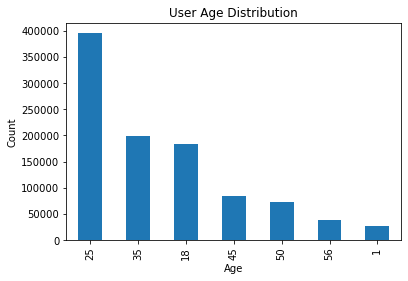

In [16]:
dfMaster['Age'].value_counts().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('User Age Distribution')
plt.show()

2. User rating of the movie “Toy Story”

In [17]:
dfMaster['Title'].head(10)

0                             Toy Story (1995)
1                            Pocahontas (1995)
2                             Apollo 13 (1995)
3    Star Wars: Episode IV - A New Hope (1977)
4                      Schindler's List (1993)
5                    Secret Garden, The (1993)
6                               Aladdin (1992)
7       Snow White and the Seven Dwarfs (1937)
8                  Beauty and the Beast (1991)
9                                 Fargo (1996)
Name: Title, dtype: object

In [18]:
# extract all toy story movies
toystory=dfMaster[dfMaster['Title'].str.contains('Toy Story')==True]

In [19]:
toystory

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
50,3114,Toy Story 2 (1999),Animation|Children's|Comedy,1,4,978302174,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
...,...,...,...,...,...,...,...,...,...,...
998988,3114,Toy Story 2 (1999),Animation|Children's|Comedy,3023,4,970471948,F,25,7,92108
999027,3114,Toy Story 2 (1999),Animation|Children's|Comedy,5800,5,958015250,M,35,18,90804
999486,3114,Toy Story 2 (1999),Animation|Children's|Comedy,2189,4,974607816,M,1,10,60148
999869,3114,Toy Story 2 (1999),Animation|Children's|Comedy,159,4,989966944,F,45,0,37922


In [20]:
# do groupby Title & rating from toystory
toystory.groupby('Title')['Rating'].value_counts()

Title               Rating
Toy Story (1995)    4         835
                    5         820
                    3         345
                    2          61
                    1          16
Toy Story 2 (1999)  5         724
                    4         578
                    3         214
                    2          44
                    1          25
Name: Rating, dtype: int64

In [21]:
toystory.groupby(['Title','Rating']).size()

Title               Rating
Toy Story (1995)    1          16
                    2          61
                    3         345
                    4         835
                    5         820
Toy Story 2 (1999)  1          25
                    2          44
                    3         214
                    4         578
                    5         724
dtype: int64

<AxesSubplot:ylabel='Title,Rating'>

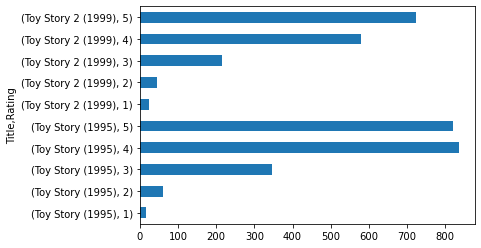

In [22]:
toystory.groupby(['Title','Rating']).size().plot(kind='barh')

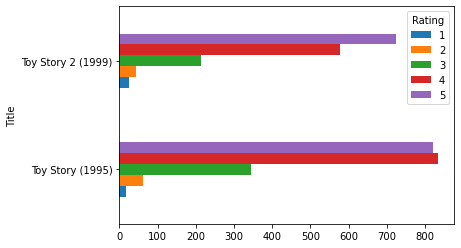

In [23]:
toystory.groupby(['Title','Rating']).size().unstack().plot(kind='barh',legend=True)
plt.show()

3. Top 25 movies by viewership rating

In [24]:
# groupby data with title ,size,sort_values
df_top25=dfMaster.groupby('Title').size().sort_values(ascending=False)[:25]

<AxesSubplot:ylabel='Title'>

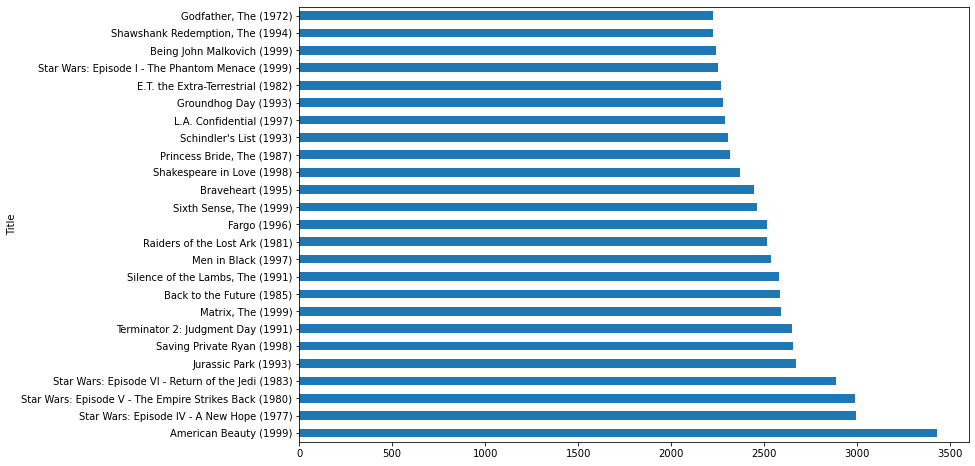

In [25]:
plt.figure(figsize=(12,8))
df_top25.plot(kind='barh')

Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [26]:
dfMaster[dfMaster['UserID']==2696]

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


In [27]:
df_2696=dfMaster[dfMaster['UserID']==2696]

In [28]:
df_2696.shape

(20, 10)

## Feature Engineering:
Use column genres:

1. Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
3. Determine the features affecting the ratings of any particular movie.
4. Develop an appropriate model to predict the movie ratings

In [29]:
dfGeneres=dfMaster['Genres'].unique()

In [30]:
dfGeneres

array(["Animation|Children's|Comedy",
       "Animation|Children's|Musical|Romance", 'Drama',
       'Action|Adventure|Fantasy|Sci-Fi', 'Drama|War', "Children's|Drama",
       "Animation|Children's|Comedy|Musical",
       "Animation|Children's|Musical", 'Crime|Drama|Thriller',
       'Animation', 'Animation|Comedy|Thriller', 'Musical|Romance',
       "Adventure|Children's|Drama|Musical", 'Musical',
       "Children's|Comedy|Musical", "Children's|Drama|Fantasy|Sci-Fi",
       'Action|Adventure|Comedy|Romance', 'Comedy|Sci-Fi',
       'Action|Adventure|Drama',
       "Adventure|Animation|Children's|Comedy|Musical", 'Drama|Romance',
       "Animation|Children's", 'Action|Drama|War', 'Comedy', 'Romance',
       'Action|Crime|Romance', 'Thriller', 'Comedy|Fantasy',
       'Comedy|Drama', "Children's|Comedy|Drama", 'Drama|Musical',
       'Drama|Romance|War|Western', 'Crime|Drama',
       'Action|Comedy|Western', 'Action|Romance|Thriller', 'Western',
       "Children's|Comedy", 'Adventure|Dr

In [31]:
#above its clumpsy so let us separate it 
# product name str split -
dfGeneres=dfMaster['Genres'].str.split('|')

In [32]:
dfGeneres

0                    [Animation, Children's, Comedy]
1          [Animation, Children's, Musical, Romance]
2                                            [Drama]
3               [Action, Adventure, Fantasy, Sci-Fi]
4                                       [Drama, War]
                             ...                    
1000204                            [Drama, Thriller]
1000205                   [Comedy, Horror, Thriller]
1000206                            [Comedy, Romance]
1000207                           [Action, Thriller]
1000208                              [Action, Drama]
Name: Genres, Length: 1000209, dtype: object

In [33]:
# extract unique data
listgeners=set()
for generes in dfGeneres:
    listgeners=listgeners.union(set(generes))

In [34]:
listgeners

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [35]:
len(listgeners)

18

2.Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to
that genre. 

In [36]:
GeneresOnehot=dfMaster['Genres'].str.get_dummies('|')  

In [37]:
GeneresOnehot

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1000205,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1000206,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1000207,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [38]:
#axis=1 means columns
dfMaster1=pd.concat([dfMaster,GeneresOnehot],axis=1)

3.Determine the features affecting the ratings of any particular movie.

In [39]:
dfMaster1

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843,...,0,0,0,0,0,0,0,1,0,0
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843,...,0,0,1,0,0,0,0,1,0,0
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843,...,0,0,0,0,0,1,0,0,0,0
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843,...,0,0,0,0,0,0,0,1,0,0


In [40]:
dfMaster1['Gender'].value_counts()

M    753769
F    246440
Name: Gender, dtype: int64

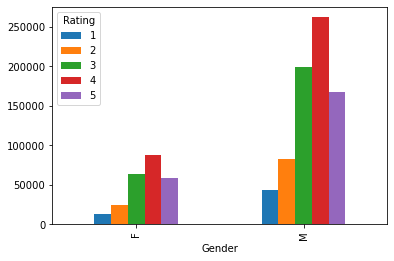

In [41]:
dfMaster1.groupby(['Gender','Rating']).size().unstack().plot(kind='bar',legend=True)
plt.show()
#we see that gender affects movie rating, male rate more than female

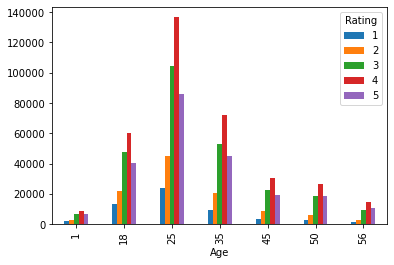

In [42]:
dfMaster1.groupby(['Age','Rating']).size().unstack().plot(kind='bar',legend=True)
plt.show()

#here we  see age alse afftects the rating

<Figure size 1440x1440 with 0 Axes>

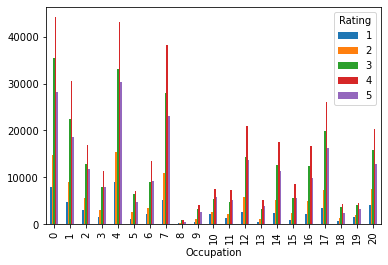

In [43]:
plt.figure(figsize=(20,20))
dfMaster1.groupby(['Occupation','Rating']).size().unstack().plot(kind='bar',legend=True)
plt.show()
#even occupation seems to affect the rating

4.Develop an appropriate model to predict the movie ratings

In [44]:
new_data=dfMaster1[:500]

In [45]:
new_data.shape

(500, 28)

In [46]:
new_data.columns


Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')

label means columns

ML- Predict Analysis-
Supervised data- Output label is present - Classification- Classes (yes no), Regression-continous value-salary,profit,temp,run,
unsupervised-group all-clusters

In [47]:
# prepare data
X=new_data[['MovieID','Age', 'Occupation','Gender']]

In [48]:
X

,MovieID,Age,Occupation,Gender
0,1,1,10,F
1,48,1,10,F
2,150,1,10,F
3,260,1,10,F
4,527,1,10,F
...,...,...,...,...
495,1197,35,1,F
496,1198,35,1,F
497,1200,35,1,F
498,1201,35,1,F


In [49]:
label=new_data[['Rating']].values

In [50]:
label

array([[5],
       [5],
       [5],
       [4],
       [5],
       [4],
       [4],
       [4],
       [5],
       [4],
       [3],
       [3],
       [3],
       [4],
       [3],
       [4],
       [4],
       [5],
       [5],
       [5],
       [5],
       [4],
       [5],
       [3],
       [4],
       [4],
       [5],
       [5],
       [4],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [3],
       [3],
       [5],
       [4],
       [3],
       [4],
       [4],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [5],
       [5],
       [4],
       [2],
       [4],
       [4],
       [3],
       [4],
       [4],
       [4],
       [3],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [3],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [3],
       [3],
    

In [51]:
X['Gender']=X['Gender'].replace('M','0')
X['Gender']=X['Gender'].replace('F','1')

C:\Users\new\AppData\Local\Temp\ipykernel_6700\547732783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender']=X['Gender'].replace('M','0')
C:\Users\new\AppData\Local\Temp\ipykernel_6700\547732783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender']=X['Gender'].replace('F','1')


In [52]:
X

,MovieID,Age,Occupation,Gender
0,1,1,10,1
1,48,1,10,1
2,150,1,10,1
3,260,1,10,1
4,527,1,10,1
...,...,...,...,...
495,1197,35,1,1
496,1198,35,1,1
497,1200,35,1,1
498,1201,35,1,1


In [53]:
X.dtypes

MovieID        int64
Age            int64
Occupation     int64
Gender        object
dtype: object

In [54]:
X['Gender']=X['Gender'].astype('int')

C:\Users\new\AppData\Local\Temp\ipykernel_6700\1446129506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender']=X['Gender'].astype('int')


In [55]:
X=X.values

In [56]:
X

array([[   1,    1,   10,    1],
       [  48,    1,   10,    1],
       [ 150,    1,   10,    1],
       ...,
       [1200,   35,    1,    1],
       [1201,   35,    1,    1],
       [1203,   35,    1,    1]], dtype=int64)

In [57]:
label=new_data[['Rating']].values

In [58]:
label

array([[5],
       [5],
       [5],
       [4],
       [5],
       [4],
       [4],
       [4],
       [5],
       [4],
       [3],
       [3],
       [3],
       [4],
       [3],
       [4],
       [4],
       [5],
       [5],
       [5],
       [5],
       [4],
       [5],
       [3],
       [4],
       [4],
       [5],
       [5],
       [4],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [3],
       [3],
       [5],
       [4],
       [3],
       [4],
       [4],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [5],
       [5],
       [4],
       [2],
       [4],
       [4],
       [3],
       [4],
       [4],
       [4],
       [3],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [3],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [3],
       [3],
    

In [59]:
# Create train data & test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,label,test_size=0.20,random_state=42)

In [60]:
X_train.shape

(400, 4)

In [61]:
X_test.shape

(100, 4)

In [62]:
y_train.shape

(400, 1)

In [63]:
y_test.shape

(100, 1)

In [64]:
# Apply Linear Regression 
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [65]:
lr.fit(X_train,y_train)

LinearRegression()

In [66]:
y_pred=lr.predict(X_test)

In [67]:
y_pred

array([[3.46596348],
       [3.96471588],
       [4.31047093],
       [3.99788954],
       [3.68849118],
       [4.27254115],
       [4.30172875],
       [4.05316268],
       [4.02252707],
       [4.18751639],
       [4.2936504 ],
       [3.81923886],
       [4.26506799],
       [3.90352061],
       [4.31625205],
       [4.28057831],
       [4.14845859],
       [4.13671417],
       [3.75346841],
       [4.24955767],
       [4.15804678],
       [4.15720077],
       [3.90518754],
       [3.49627911],
       [3.96076779],
       [4.18032524],
       [4.14803558],
       [3.7680548 ],
       [3.75335251],
       [3.65335635],
       [4.17130106],
       [3.64912626],
       [4.19047745],
       [3.92527304],
       [4.35822974],
       [3.65561239],
       [4.24391756],
       [3.97811115],
       [3.78314211],
       [4.05270169],
       [4.28791046],
       [3.82230294],
       [4.16199486],
       [3.84659342],
       [4.10287347],
       [3.95963977],
       [4.37923917],
       [4.277

In [68]:
y_test

array([[4],
       [3],
       [4],
       [2],
       [5],
       [4],
       [4],
       [4],
       [5],
       [5],
       [4],
       [3],
       [3],
       [4],
       [4],
       [5],
       [5],
       [4],
       [5],
       [4],
       [4],
       [4],
       [3],
       [4],
       [5],
       [5],
       [5],
       [3],
       [3],
       [4],
       [5],
       [5],
       [4],
       [5],
       [5],
       [4],
       [4],
       [4],
       [5],
       [4],
       [4],
       [3],
       [4],
       [4],
       [5],
       [4],
       [5],
       [3],
       [3],
       [5],
       [4],
       [4],
       [4],
       [4],
       [5],
       [4],
       [3],
       [5],
       [4],
       [5],
       [5],
       [4],
       [5],
       [3],
       [4],
       [3],
       [3],
       [4],
       [5],
       [5],
       [4],
       [4],
       [3],
       [5],
       [4],
       [3],
       [3],
       [4],
       [4],
       [5],
       [4],
       [3],
       [5],
    

In [69]:
# create error 
from sklearn.metrics import mean_squared_error
print('Mean Squared Error',mean_squared_error(y_test,y_pred))

Mean Squared Error 0.6489142338657047
